In [9]:
from data_loaders import load_AUCS, display_MLG
from sc_ged import SC_GED
from evaluate import evaluate_model

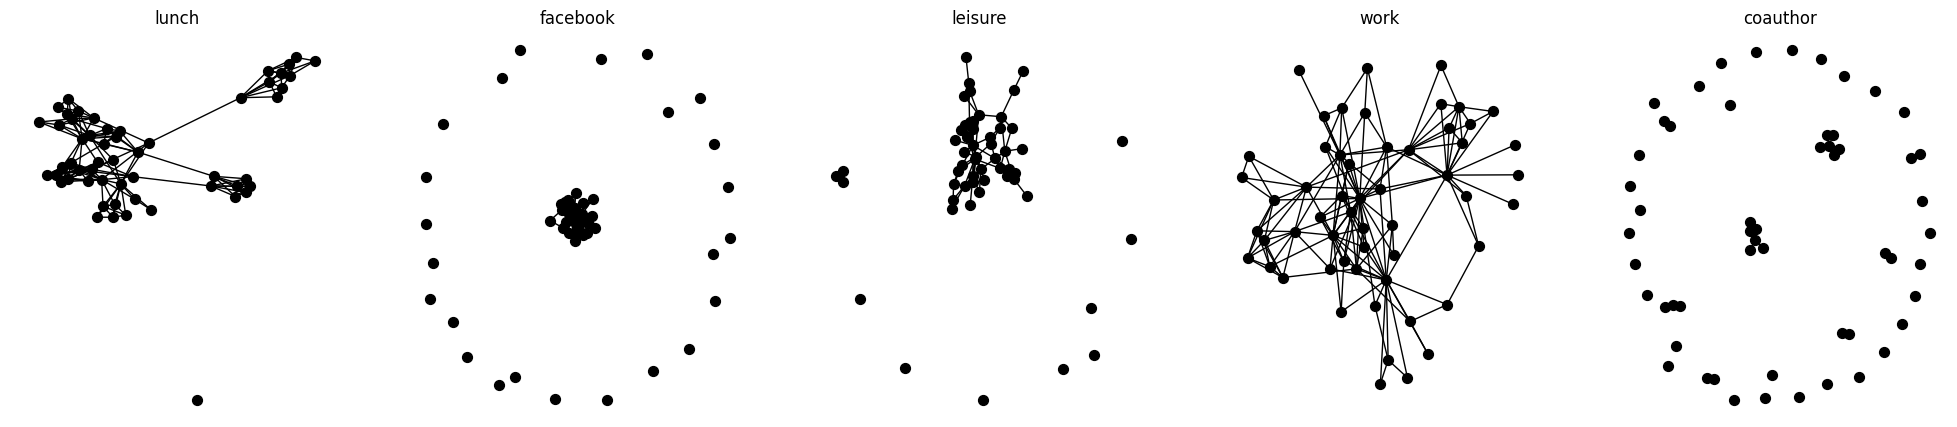

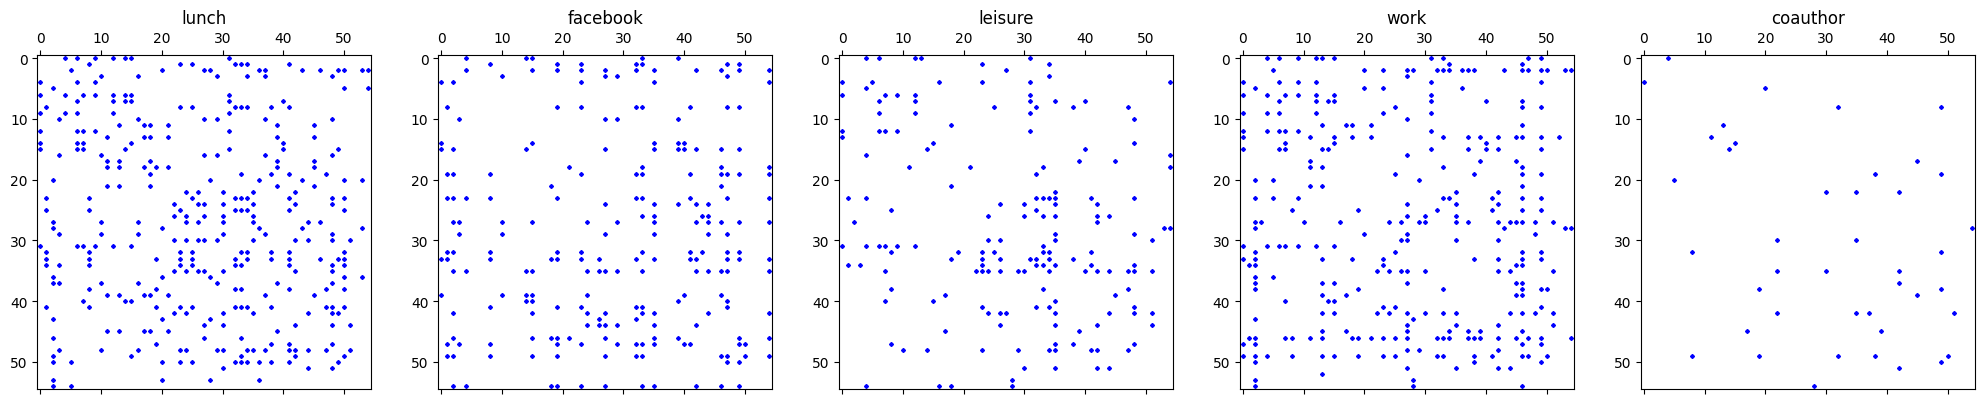

In [10]:
MLG, layer_labels, true_labels = load_AUCS()
display_MLG(MLG, layer_labels)

start decomposition


Joint Eigen Decomposition: 100%|██████████| 1000/1000 [00:18<00:00, 52.90it/s]


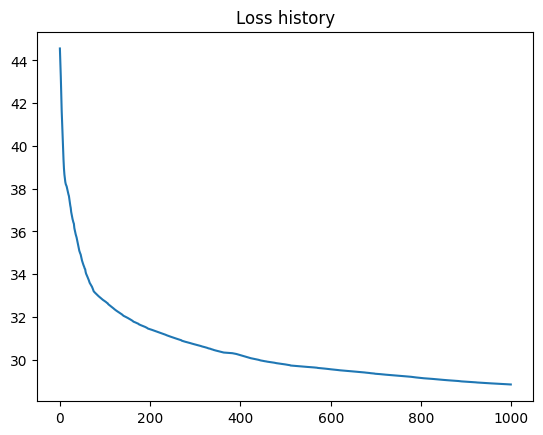

norm of P: 7.949717998504639
norm of Q: 7.8876543045043945
norm of P @ Q - I: 0.07681446522474289
Best accuracy: 0.8363636363636363


In [14]:
model = SC_GED(MLG, k=7, most_informative=4, alpha=0.5, beta=20)
clustering = evaluate_model(model, true_labels, n_iter=1_000)


Results:
* requires manually choosing beta and alpha for each specific case which is not always ideal when we don't have the real labels: very sensitive to alpha and beta values
* Requires a lot of comupations to find the eigenvalues of all layers and eigenvectors of the most informative layer: not suited for high dimentional datasets